In [1]:
# TASK 1: Student Pass/Fail Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
data = pd.read_csv('STUDENTS.csv')
print(" Data Loaded:")
print(data.head())
# 2. Data Exploration
print("\nMissing values:\n", data.isnull().sum())
print("\nData Summary:\n", data.describe())

 Data Loaded:
   Study Hours  Attendance  Pass
0     8.494481   65.214138     0
1    15.408572   91.437540     1
2    12.783927   83.384964     1
3    11.183902   75.847121     1
4     5.872224   86.327819     1

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Data Summary:
        Study Hours  Attendance        Pass
count   750.000000  750.000000  750.000000
mean      9.935864   80.671717    0.672000
std       3.530035    9.674301    0.469798
min       4.060739   51.037446    0.000000
25%       6.876494   74.263095    0.000000
50%      10.032396   80.724421    1.000000
75%      13.023984   87.009570    1.000000
max      15.996612  100.000000    1.000000


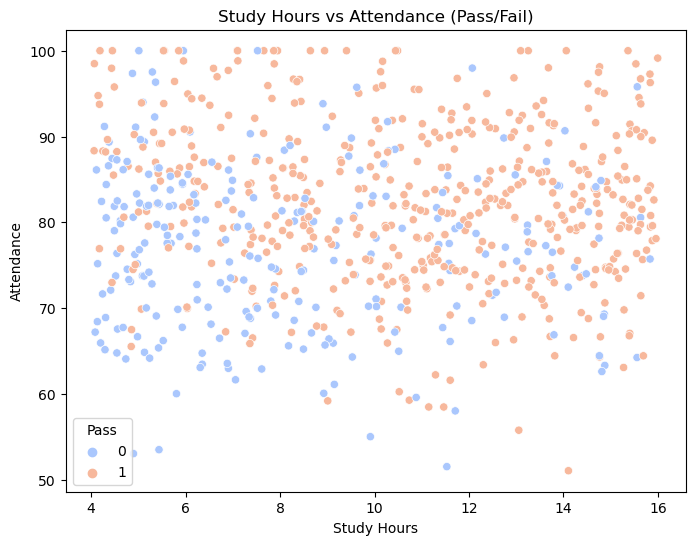

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

In [7]:
X = data[['Study Hours', 'Attendance']]
y = data['Pass']

# Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Fail','Pass']))



Classification Report:
               precision    recall  f1-score   support

        Fail       0.76      0.50      0.60        62
        Pass       0.79      0.92      0.85       126

    accuracy                           0.78       188
   macro avg       0.77      0.71      0.73       188
weighted avg       0.78      0.78      0.77       188



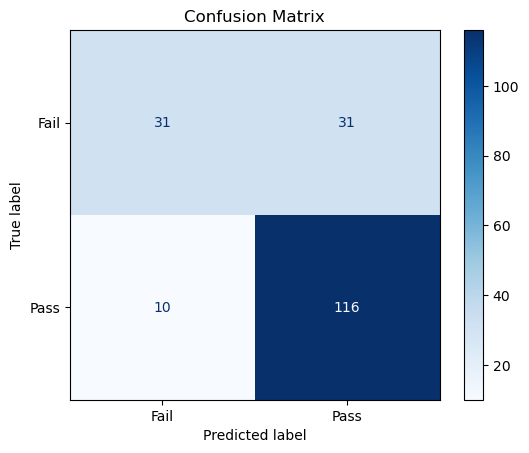

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [9]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nFeature Importance (Model Coefficients):")
print(coefficients)


Feature Importance (Model Coefficients):
       Feature  Coefficient
0  Study Hours     0.822216
1   Attendance     0.701021


In [10]:
 #TASK 2: Sentiment Analysis with NLP

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# NLTK Setup
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiteja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df = pd.read_csv('REVIEWS.csv')
print("Data Loaded:")
print(df.head())
# Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned Text'] = df['Review Text'].apply(preprocess_text)
print("\nCleaned Text Example:")
print(df[['Review Text', 'Cleaned Text']].head())

Data Loaded:
         Review Text Sentiment
0  Broke immediately  negative
1     Best I've used  positive
2  Excellent quality  positive
3  Excellent quality  positive
4     Will buy again  positive

Cleaned Text Example:
         Review Text       Cleaned Text
0  Broke immediately  broke immediately
1     Best I've used      best ive used
2  Excellent quality  excellent quality
3  Excellent quality  excellent quality
4     Will buy again                buy


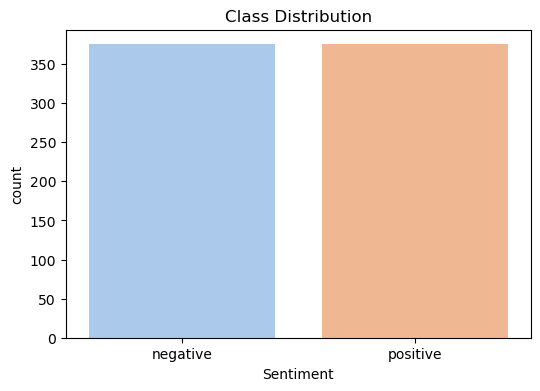

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title('Class Distribution')
plt.show()

In [22]:
df['Label'] = df['Sentiment'].map({'negative': 0, 'positive': 1})

# 5. Train-Test Split (stratify to maintain balance)
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned Text'], df['Label'], test_size=0.25, random_state=42, stratify=df['Label']
)

#  TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=500)
model.fit(X_train_vec, y_train)

# Model Evaluation
y_pred = model.predict(X_test_vec)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['negative','positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        94
    positive       1.00      1.00      1.00        94

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



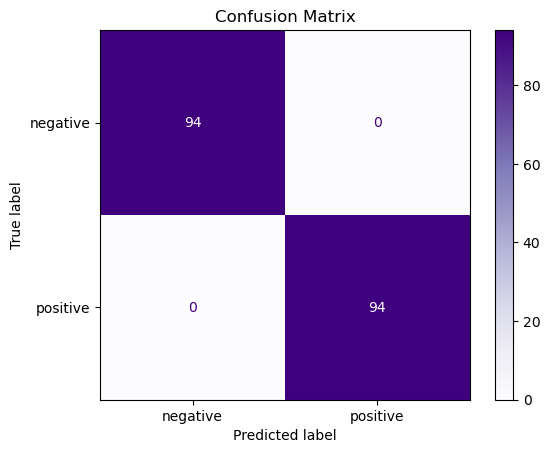

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()


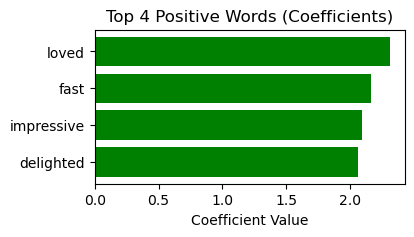

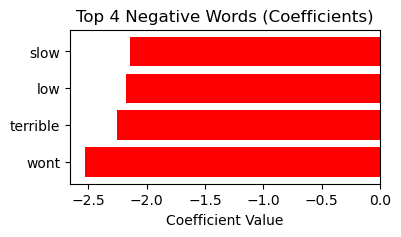

In [31]:
coefficients = model.coef_[0]
feature_names = np.array(vectorizer.get_feature_names_out())
top_positive_indices = coefficients.argsort()[-4:]
top_negative_indices = coefficients.argsort()[:4]

plt.figure(figsize=(4,2))
plt.barh(feature_names[top_positive_indices], coefficients[top_positive_indices], color='green')
plt.title('Top 4 Positive Words (Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

plt.figure(figsize=(4,2))
plt.barh(feature_names[top_negative_indices], coefficients[top_negative_indices], color='red')
plt.title('Top 4 Negative Words (Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

In [30]:
#  Example Predictions
results = pd.DataFrame({
    'Review': X_test,
    'True Sentiment': y_test.map({0: 'negative', 1: 'positive'}),
    'Predicted': pd.Series(y_pred, index=y_test.index).map({0: 'negative', 1: 'positive'})
})
print("\nSample Predictions:")
print(results.head())


Sample Predictions:
                    Review True Sentiment Predicted
97                   happy       positive  positive
117  exceeded expectations       positive  positive
22        terrible product       negative  negative
437           disappointed       negative  negative
358       highly recommend       positive  positive
